# Admission Prediction

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Dataset

In [53]:
df = pd.read_csv('Admission_Prediction.csv')

In [54]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


#### Basic Checks

In [55]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [56]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [58]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


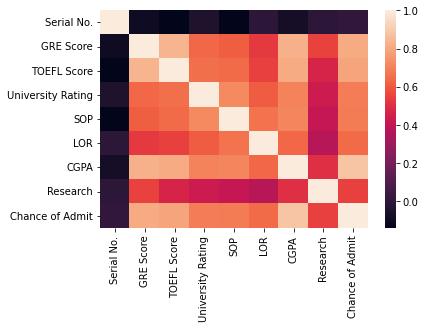

In [59]:
sns.heatmap(df.corr(),fmt='.2g')

#### Rename Columns

In [60]:
df.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score',
                     'University Rating':'University_Rating',
                     'Chance of Admit':'Chance_of_Admit'}
            ,inplace=True)

In [61]:
df.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

Drop serial number

In [62]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [63]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


### Check for missing values and outliers

#### Checking for null Values

In [64]:
df.isnull().sum()

GRE_Score            15
TOEFL_Score          10
University_Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_Admit       0
dtype: int64

We must remove the null Values

In [65]:
df.loc[df['GRE_Score'].isnull()==True]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
12,NaN,112.0,4.0,4.0,4.5,9.10,1,0.78
23,NaN,119.0,5.0,5.0,4.5,9.70,1,0.95
36,NaN,106.0,2.0,4.0,4.0,8.40,0,0.64
51,NaN,100.0,2.0,1.5,3.5,7.90,1,0.56
70,NaN,118.0,5.0,5.0,5.0,9.64,1,0.94
124,NaN,106.0,4.0,2.5,3.0,8.47,0,0.57
155,NaN,109.0,3.0,3.0,3.0,8.69,0,0.77
182,NaN,100.0,2.0,3.0,3.5,7.88,0,0.68
218,NaN,110.0,4.0,3.0,3.5,8.97,1,0.84


We will impute them with mode and mean values.

In [66]:
df['University_Rating'] = df['University_Rating'].fillna(df['University_Rating'].mode()[0])

df['TOEFL_Score'] = df['TOEFL_Score'].fillna(df['TOEFL_Score'].mean())

df['GRE_Score']  = df['GRE_Score'].fillna(df['GRE_Score'].mean())

In [67]:
df.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

We have removed all the null values 

#### Checking for outliers

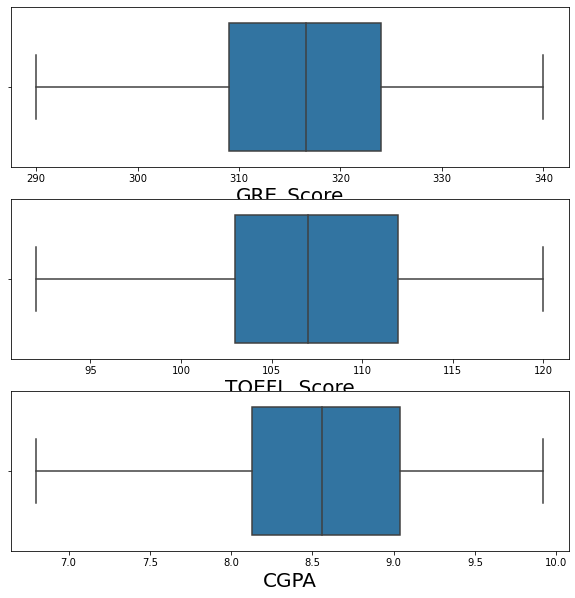

In [68]:
box=df[['GRE_Score', 'TOEFL_Score','CGPA']]
plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=6 :     # as there are 9 columns in the data
        ax = plt.subplot(3,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

There are no outliers, so we can continue to the EDA step

### Exploratory Data Analysis

In [69]:
df.corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.819663,0.623394,0.608372,0.527623,0.818347,0.544993,0.802304
TOEFL_Score,0.819663,1.000000,0.644296,0.643155,0.535785,0.805557,0.464913,0.786675
University_Rating,0.623394,0.644296,1.000000,0.713657,0.606949,0.697704,0.424966,0.681482
SOP,0.608372,0.643155,0.713657,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.527623,0.535785,0.606949,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.818347,0.805557,0.697704,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.544993,0.464913,0.424966,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.802304,0.786675,0.681482,0.684137,0.645365,0.882413,0.545871,1.000000


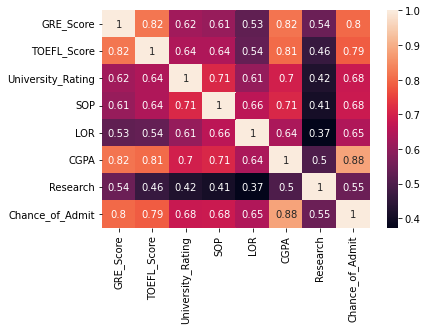

In [70]:
sns.heatmap(df.corr(),annot=True)

In [75]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


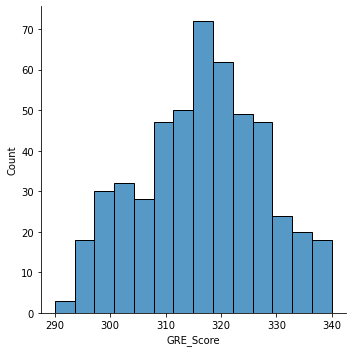

In [72]:
sns.displot(df.GRE_Score.dropna(axis=0))
plt.show()

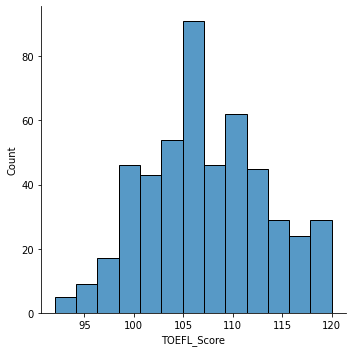

In [73]:
sns.displot(df.TOEFL_Score.dropna(axis=0))
plt.show()

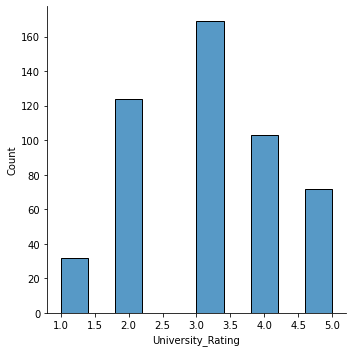

In [74]:
sns.displot(df.University_Rating.dropna(axis=0))
plt.show()

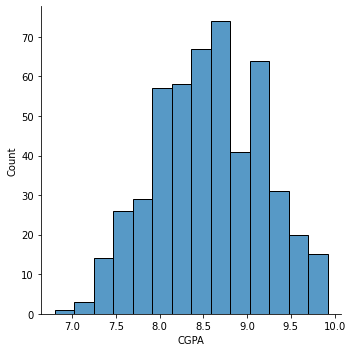

In [82]:
sns.displot(df.CGPA.dropna(axis=0))
plt.show()

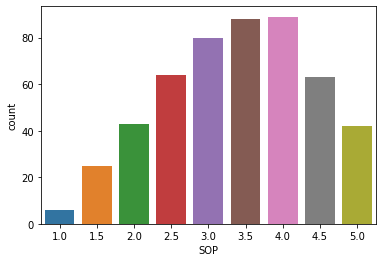

In [78]:
sns.countplot(x='SOP',data=df)
plt.show()

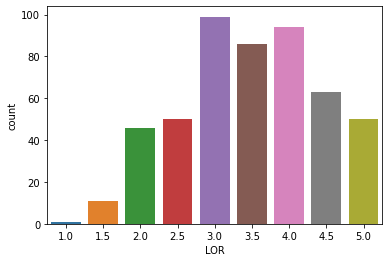

In [80]:
sns.countplot(x='LOR',data=df)
plt.show()

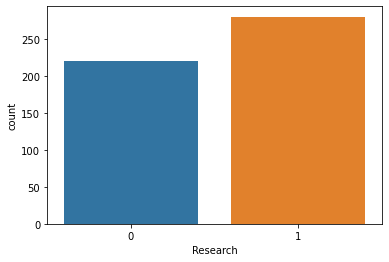

In [84]:
sns.countplot(x='Research',data=df)
plt.show()

### Implementing algorithm

In [87]:
X=df.iloc[:,0:-1]
y=df.Chance_of_Admit

In [90]:
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [89]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance_of_Admit, Length: 500, dtype: float64

In [92]:
X=df.iloc[:,0:7] ## independent variables
y=df.Chance_of_Admit ## dependent or target variable.

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [96]:
from sklearn.linear_model import LinearRegression ## importing the model library 

model=LinearRegression() ## creating the model object 
model.fit(X_train,y_train) ## fitting the training data.
y_hat=model.predict(X_test) ## prediciton from model

In [97]:
y_hat

array([0.91672616, 0.79942231, 0.56537979, 0.71862135, 0.8175083 ,
       0.86211708, 0.47703811, 0.68387279, 0.82887511, 0.80907627,
       0.71810694, 0.72660196, 0.64934137, 0.93415008, 0.82748891,
       0.51040402, 0.83525243, 0.59940765, 0.53462827, 0.57206316,
       0.66614056, 0.55142244, 0.72357103, 0.79269463, 0.77908602,
       0.60610011, 0.95192416, 0.84668915, 0.62499053, 0.74517829,
       0.55420619, 0.7304802 , 0.54296781, 0.86424788, 0.65376644,
       0.73670757, 0.55500483, 0.9287975 , 0.64603766, 0.71146422,
       0.969428  , 0.57490522, 0.69110891, 0.85847298, 0.93998053,
       0.57952146, 0.95980988, 0.83805971, 0.79556134, 0.92836647,
       0.8920795 , 0.59797278, 0.70562358, 0.52141272, 0.95384125,
       0.58675825, 0.958073  , 0.73934295, 0.66769138, 0.50076826,
       0.63491504, 0.68223864, 0.59945475, 0.58819371, 0.43823095,
       0.58443491, 0.86932829, 0.89844722, 0.65768374, 0.70561723,
       0.61866988, 0.78440334, 0.68827935, 0.55834194, 0.55571

Hence Linear Regression has been implemented successfully